## Here we are train to train a model on a single image with random shapes to understand image segmentation



*   Input image is a single with random shapes
*   output image is a segmented image

We provide the model with input image as an input and it finds a transform on its own to get to the output image.


In [17]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.transforms as T
import cv2
#from your_dataset_module import CustomSegmentationDataset  # Replace with your dataset module

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    T.Resize(size = (256,256))
])

#image = torchvision.io.read_image('/content/image.jpg')
#output = torchvision.io.read_image('/content/output_image.jpg')

#import input image
image = cv2.imread('/content/input.jpg',)
# Import segmented image
output = cv2.imread('/content/output.jpg',0)

image = transform(image)
output = transform(output)

print(image.shape)
print(output.shape)
print(image)
print(output)

train_loader = (image,output)

# Load your custom dataset
# train_dataset = CustomSegmentationDataset(root='train_data/', transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Define the U-Net model
class UNet(nn.Module):
    # Define your U-Net architecture
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        # Encoder (Contracting Path)
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder (Expansive Path)
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, out_channels, kernel_size=2, stride=2)
        )

    def forward(self, x):
        # Encoder
        enc1 = self.encoder(x)

        # Bottleneck
        bottleneck = self.bottleneck(enc1)

        # Decoder
        dec1 = self.decoder(bottleneck)

        return dec1

# Instantiate the model, loss function, and optimizer
model = UNet(3,1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(image)
    loss = criterion(outputs, output)
    loss.backward()
    optimizer.step()

# Save the trained model
torch.save(model.state_dict(), 'segmentation_model.pth')


torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..

In [18]:
import numpy as np

# Test image used , is a different image from the one model is trained on
test_image = cv2.imread('/content/shape_2.jpg',)
test_image = transform(test_image)

model = UNet(3,1)
model.load_state_dict(torch.load(f='/content/segmentation_model.pth'))

with torch.inference_mode():
  pred = model(test_image)

pred = np.array(pred)
pred.shape

(1, 256, 256)

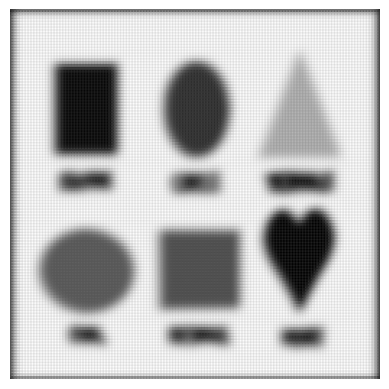

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample NumPy array (1 channel, 256x256 pixels)
image_np = pred

# Reshape the array if necessary (remove the single channel dimension)
image_np = image_np.squeeze()

# Plot the image
plt.imshow(image_np, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [20]:
import numpy as np

# Test image used , is a different image from the one model is trained on
test_image = cv2.imread('/content/shape_test.jpg',)
test_image = transform(test_image)

model = UNet(3,1)
model.load_state_dict(torch.load(f='/content/segmentation_model.pth'))

with torch.inference_mode():
  pred = model(test_image)

pred = np.array(pred)
pred.shape

(1, 256, 256)

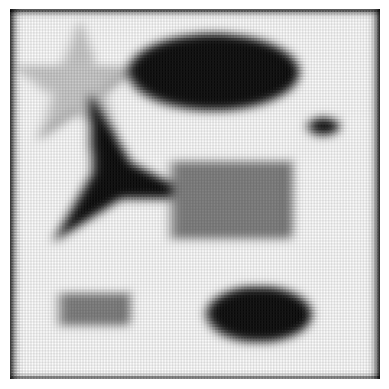

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample NumPy array (1 channel, 256x256 pixels)
image_np = pred

# Reshape the array if necessary (remove the single channel dimension)
image_np = image_np.squeeze()

# Plot the image
plt.imshow(image_np, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()